In [1]:
import pandas as pd
import datetime as datetime
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
from numpy import linalg as la
from datetime import date
from numpy import cumsum

In [2]:
data = pd.read_csv("IStandWithPutin_tweets.csv")

In [3]:
data

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1516529645243490315,1516460961565192197,1.650404e+12,2022-04-19 17:30:17,-400,NaN,@PurebloodLucy @beverleyturner Agreed re: Bev ...,en,['istandwithputin'],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PurebloodLucy', 'name': 'Luc...",NaN,NaN,NaN,NaN
1,1,1516527180406263815,1516527180406263815,1.650403e+12,2022-04-19 17:20:30,-400,NaN,Biden and his hypocritical allies put so-calle...,en,['istandwithputin'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1516525735996968960,1516525735996968960,1.650403e+12,2022-04-19 17:14:45,-400,NaN,READY! #Putin #IStandWithPutin #Russians #Russ...,en,"['putin', 'istandwithputin', 'russians', 'russ...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1516519445287612424,1516465039691157511,1.650401e+12,2022-04-19 16:49:45,-400,NaN,"@vonderleyen @POTUS #IStandWithPutin Ukraine,U...",en,['istandwithputin'],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vonderleyen', 'name': 'Ursul...",NaN,NaN,NaN,NaN
4,4,1516499428554985473,1516261463903842307,1.650397e+12,2022-04-19 15:30:13,-400,NaN,@RusEmb_Malaysia #IStandWithRussia 🇮🇩🇷🇺 #IStan...,und,"['istandwithrussia', 'istandwithputin', 'savep...",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RusEmb_Malaysia', 'name': 'E...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,650,1513473026892914693,1513473026892914693,1.649675e+12,2022-04-11 07:04:23,-400,NaN,Must have had one hell of a headache after hit...,en,"['россия', 'рф', 'мненестыдно', 'мыедины', 'pu...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
651,651,1513471990350422021,1513457184025329664,1.649675e+12,2022-04-11 07:00:16,-400,NaN,@RussianEmbassy @UN @mfa_russia @RussiaUN @Rus...,en,"['istandwithputin', 'istandwithrussia']",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RussianEmbassy', 'name': 'Ru...",NaN,NaN,NaN,NaN
652,652,1513470999634886657,1513470999634886657,1.649675e+12,2022-04-11 06:56:19,-400,NaN,100 🇵🇱 toys will soon become 100 🇵🇱 scrap meta...,en,"['putin', 'istandwithputin', 'istandwithrussia...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
653,653,1513470682784489479,1513470682784489479,1.649675e+12,2022-04-11 06:55:04,-400,NaN,#BanRussianOil #StandUpForUkraine #StandWithUk...,und,"['banrussianoil', 'standupforukraine', 'standw...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
sorted_data = data.sort_values('date')
sorted_data['date'] = pd.to_datetime(sorted_data['date'])
start_date = sorted_data['date'][654]

In [5]:
array_cumulative = []
running_sum = 0
while start_date < sorted_data['date'][0]:
    delta = datetime.timedelta(hours = 6)
    next_time = start_date + delta
    df = sorted_data[(sorted_data['date']>=start_date) & (sorted_data['date']<next_time)]
    start_date = next_time
    running_sum = running_sum + len(df)
    array_cumulative.append(running_sum)

In [6]:
array_cumulative

[23,
 45,
 67,
 84,
 110,
 133,
 147,
 162,
 189,
 213,
 224,
 236,
 255,
 262,
 282,
 297,
 318,
 338,
 360,
 369,
 387,
 399,
 408,
 423,
 436,
 473,
 480,
 493,
 535,
 564,
 583,
 605,
 645,
 655]

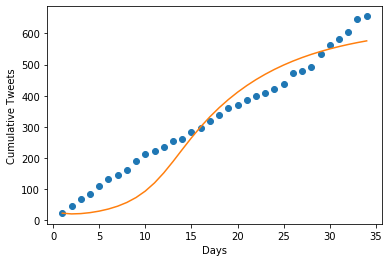

Relative error with SEIZ model:  6.31007694747366
Optimal params:  [5.61182486e+00 4.27250818e+01 6.91429081e-01 6.84805478e-01
 5.03709705e-17 3.23184986e-01]


In [18]:
xdata = np.array(range(1, len(array_cumulative)+1))
ydata = array_cumulative

def seiz_model(y, x, beta, b, p, l, rho, eps):
    S = -beta*y[0]*(y[1]/N) - b*y[0]*(y[3]/N)
    E = (1-p)*beta*S*(y[1]/N) + (1-l)*b*S*(y[3]/N) - rho*y[2]*(y[1]/N) - eps*y[2]
    I = p*beta*S*(y[1]/N) + rho*E*(y[1]/N) + eps*E
    Z = l*b*S*(y[3]/N)
    return S, E, I, Z

def fit_seiz(x, beta, b, p, l, rho, eps):
    return integrate.odeint(seiz_model, (S0, I0, E0, Z0), x, args=(beta, b, p, l, rho, eps))[:,1]

N = 1000
I0 = ydata[0]
E0 = 0
Z0 = 0
S0 = N - I0 - E0 - Z0

popt, pcov = optimize.curve_fit(fit_seiz, xdata, ydata, bounds=([0,0,0,0,0,0], [np.inf, np.inf, 1, 1, np.inf, np.inf]))
fitted = fit_seiz(xdata, *popt)
rel_err = la.norm((ydata - fitted)/fitted)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.xlabel("Days")
plt.ylabel("Cumulative Tweets")
plt.show()
print("Relative error with SEIZ model: ", rel_err)
print("Optimal params: ", popt)